In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
files=['datos_obs/StationsReport_2022118104831.xlsx',
       'datos_obs/StationsReport_2022118104921.xlsx',
       'datos_obs/StationsReport_2022118104959.xlsx',
       'datos_obs/StationsReport_2022118105125.xlsx',
       'datos_obs/StationsReport_2022118105244.xlsx',
       'datos_obs/StationsReport_202211810526.xlsx',
       'datos_obs/StationsReport_2022118105338.xlsx',
       'datos_obs/StationsReport_2022118105430.xlsx',
       'datos_obs/StationsReport_2022118105514.xlsx']
Vel_Viento={}
Dir_Viento={}
Vel_Viento_x={}
Vel_Viento_y={}
Vel_Media_x={}
Vel_Media_y={}
PM25={}

In [3]:
PM2=0
PM10=0
for file in files:
    df=pd.read_excel(file)
    stations=list(df.iloc[1].dropna()[0:])
    if 'DateTime' in stations:
        stations.remove('DateTime')
    df=df[2:-11]
    index=list(df.iloc[0])
    index[0]='DateTime'
    df.columns=index
    df=df[4:].reset_index(drop='True')
    df2=df[['Vel Viento','Dir Viento']]
    df2=df2[df2.iloc[:,0]!='----']
    df2=df2[df2.iloc[:,1]!='----']
    if len(list(df2.columns))>2:
        df2=df2[df2.iloc[:,2]!='----'] 
        df2=df2[df2.iloc[:,3]!='----']
    for i in range(int(len(list(df2.columns))/2)):
        print(stations[i])
        Vel_Viento[stations[i]]=list(df2.iloc[:,i*2])
        Vel_Viento[stations[i]]=np.array([x for x in Vel_Viento[stations[i]] if x!='----'])
        Dir_Viento[stations[i]]=list(df2.iloc[:,i*2+1])
        Dir_Viento[stations[i]]=np.array([x for x in Dir_Viento[stations[i]] if x!='----'])
        Vel_Viento_x[stations[i]]=Vel_Viento[stations[i]]*np.sin(np.pi*Dir_Viento[stations[i]]/180)
        Vel_Viento_y[stations[i]]=Vel_Viento[stations[i]]*np.cos(np.pi*Dir_Viento[stations[i]]/180)
        Vel_Media_x[stations[i]]=Vel_Viento_x[stations[i]].mean()
        Vel_Media_y[stations[i]]=Vel_Viento_y[stations[i]].mean()
        if 'PM2.5' in list(df.columns):
            mean=df['PM2.5'][df['PM2.5']!='----'].mean()
            if isinstance(mean,float):
                PM25[stations[i]]=df['PM2.5'][df['PM2.5']!='----'].mean()
            else:
                PM25[stations[i]]=df['PM2.5'][df['PM2.5']!='----'].mean()[i]

Carvajal - Sevillana
Centro de Alto Rendimiento
Ciudad Bolivar
Colina
Fontibon
Jazmin
MinAmbiente
Movil 7ma
Kennedy
Las Ferias
San Cristobal
Suba
Tunal
Usaquen


In [4]:
stations_grid={'Carvajal - Sevillana':[70,125],
 'Centro de Alto Rendimiento':[120,210],
 'Ciudad Bolivar':[30,50],
 'Colina':[55,330],
 'Fontibon':[30,180],
 'Jazmin':[150,120],
 'MinAmbiente':[170,180],
 'Movil 7ma':[170,200],
 'Kennedy':[30,150],
 'Las Ferias':[65,205],
 'San Cristobal':[160,40],
 'Suba':[3,300],
 'Tunal':[90,50],
 'Usaquen':[170,300]}

In [5]:
wind_speed_x=np.zeros((180,400))
wind_speed_y=np.zeros((180,400))
for key in list(stations_grid.keys()):
    print(key)
    x=stations_grid[key][0]
    y=stations_grid[key][1]
    A_x=Vel_Media_x[key]
    A_y=Vel_Media_y[key]
    for i in range(wind_speed_x.shape[0]):
        for j in range(wind_speed_x.shape[1]):
            r=np.sqrt((x-i)**2+(y-j)**2)
            wind_speed_x[i][j]+=A_x*np.exp(-(r/100)**2)
            wind_speed_y[i][j]+=A_y*np.exp(-(r/100)**2)

Carvajal - Sevillana
Centro de Alto Rendimiento
Ciudad Bolivar
Colina
Fontibon
Jazmin
MinAmbiente
Movil 7ma
Kennedy
Las Ferias
San Cristobal
Suba
Tunal
Usaquen


<AxesSubplot:>

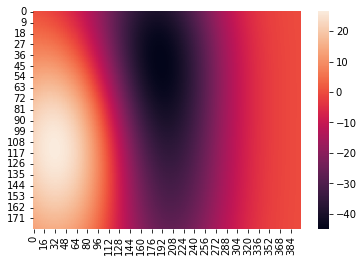

In [20]:
sns.heatmap(wind_speed_x)

In [10]:
data=open('viento_x.csv','w')
line=''
for j in range(400):
    for i in range(180):
        line=line+str(wind_speed_x[i][j])+','
line=line[:-1]+'\n'
data.write(line)
data.close()

In [11]:
data=open('viento_y.csv','w')
line=''
for j in range(400):
    for i in range(180):
        line=line+str(wind_speed_y[i][j])+','
line=line[:-1]+'\n'
data.write(line)
data.close()

In [9]:
data=open('viento_x.dat','w')
line=''
for i in range(180):
    for j in range(400):
        line=str(i)+' '+str(j)+' '+str(wind_speed_x[i][j])+'\n'
        data.write(line)
data.close()

In [10]:
data=open('viento_y.dat','w')
line=''
for i in range(180):
    for j in range(400):
        line=str(i)+' '+str(j)+' '+str(wind_speed_y[i][j])+'\n'
        data.write(line)
data.close()